In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HeavenlyChocolate.csv to HeavenlyChocolate (1).csv
User uploaded file "HeavenlyChocolate.csv" with length 1730 bytes


In [0]:
import pandas as pd
from pandas import DataFrame,Series
data=pd.read_csv('HeavenlyChocolate.csv')
data

,Customer,Day,Browser,Time (min),Pages Viewed,Amount Spent ($)
0,1,Mon,Internet Explorer,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Internet Explorer,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Internet Explorer,11.3,4,66.27
5,6,Sat,Firefox,10.5,6,67.80
6,7,Sun,Internet Explorer,11.4,2,36.04
7,8,Fri,Firefox,4.3,6,55.96
8,9,Wed,Firefox,12.7,3,70.94
9,10,Tue,Internet Explorer,24.7,7,68.73


In [0]:
data.columns

Index(['Customer', 'Day', 'Browser', 'Time (min)', 'Pages Viewed',
       'Amount Spent ($)'],
      dtype='object')

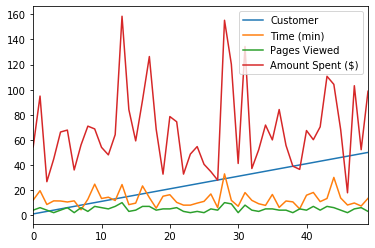

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
data.plot()

In [0]:
import numpy  as np
data.iloc[:,3:].describe()

,Time (min),Pages Viewed,Amount Spent ($)
count,50.000000,50.000000,50.000000
mean,12.810000,4.820000,68.128200
std,6.063314,2.037305,32.343758
min,4.300000,2.000000,17.840000
25%,8.650000,3.250000,45.560000
50%,11.400000,4.500000,62.150000
75%,14.900000,6.000000,82.735000
max,32.900000,10.000000,158.510000


Text(0.5, 1.0, 'Time of individual customer')

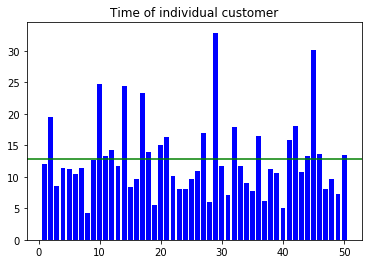

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(data['Customer'],data['Time (min)'], color='b')
ax.axhline(12.81, color="g")
ax.set_title('Time of individual customer')

Text(0.5, 1.0, 'Pages viewed of individual customer')

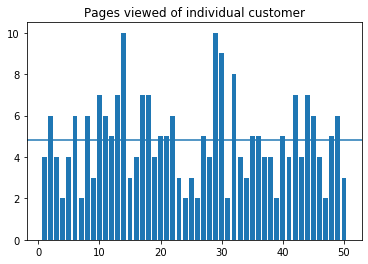

In [0]:
fig = plt.figure()
bx =fig.add_subplot(111)
bx.bar(data['Customer'],data['Pages Viewed'],)
bx.axhline(4.82)
bx.set_title('Pages viewed of individual customer')

In [0]:
df_week=data.groupby(data.Day)
df1=pd.DataFrame(df_week.Customer.count(),index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
df1

,Customer
Mon,9
Tue,7
Wed,6
Thu,5
Fri,11
Sat,7
Sun,5


In [0]:
df2=pd.DataFrame(df_week['Amount Spent ($)'].sum(),index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
df2.columns=Series(['Amount'])
df2

,Amount
Mon,813.38
Tue,414.86
Wed,341.82
Thu,294.03
Fri,945.43
Sat,378.74
Sun,218.15


In [0]:
df3=pd.DataFrame(df_week['Amount Spent ($)'].mean(),index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],dtype=np.float16)
df3.columns=Series(['Average'])
df3

,Average
Mon,90.37500
Tue,59.28125
Wed,56.96875
Thu,58.81250
Fri,85.93750
Sat,54.09375
Sun,43.62500


<BarContainer object of 7 artists>

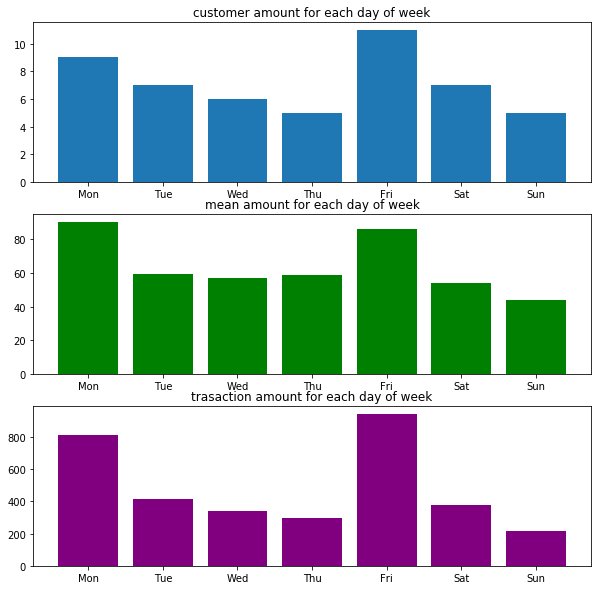

In [0]:
fig=plt.figure()
fig.set_size_inches(10,10)
a=fig.add_subplot(311)
a.set_title('customer amount for each day of week')
a.bar(df1.index,df1.Customer)
b=fig.add_subplot(313)
b.set_title('trasaction amount for each day of week')
b.bar(df2.index,df2.Amount,color='purple')
c=fig.add_subplot(312)
c.set_title('mean amount for each day of week')
c.bar(df3.index,df3.Average,color='g')


In [0]:
df_browser=data.groupby('Browser')
df_bc=DataFrame(df_browser.Customer.count())
df_bc

,Customer
Browser,
Firefox,16
Internet Explorer,27
Other,7


In [0]:
df_ba=DataFrame(df_browser['Amount Spent ($)'].sum())
df_ba.columns=Series(['Amount'])
df_ba

,Amount
Browser,
Firefox,1228.21
Internet Explorer,1656.81
Other,521.39


In [0]:
df_bm=DataFrame(df_browser['Amount Spent ($)'].mean(),dtype=float)
df_bm.columns=Series(['Average'])
df_bm

,Average
Browser,
Firefox,76.763125
Internet Explorer,61.363333
Other,74.484286


<BarContainer object of 3 artists>

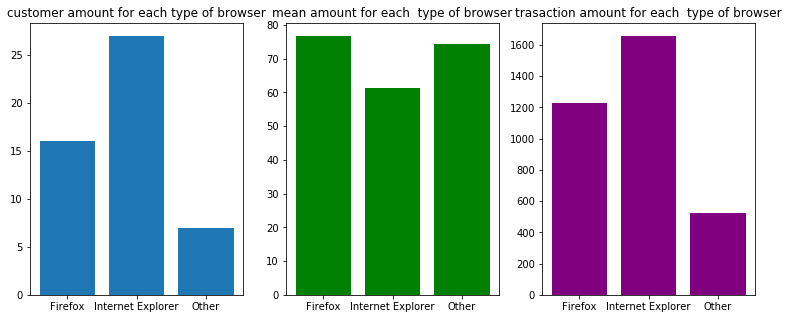

In [0]:
fig=plt.figure()
fig.set_size_inches(13,5) 
a=fig.add_subplot(131)
a.set_title('customer amount for each type of browser')
a.bar(df_bc.index,df_bc.Customer)
b=fig.add_subplot(133)
b.set_title('trasaction amount for each  type of browser')
b.bar(df_ba.index,df_ba.Amount,color='purple')
c=fig.add_subplot(132)
c.set_title('mean amount for each  type of browser')
c.bar(df_bm.index,df_bm.Average,color='g')

Text(0.5, 1.0, 'the relationship between the time spend on web and doller amount spend')

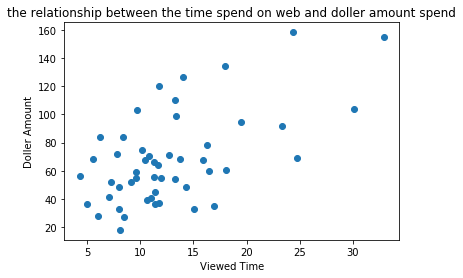

In [0]:
plt.scatter(data['Time (min)'],data['Amount Spent ($)'])
plt.xlabel('Viewed Time')
plt.ylabel('Doller Amount')
plt.title('the relationship between the time spend on web and doller amount spend')

Text(0.5, 1.0, 'the relationship between the Pages Viewed and doller amount spend')

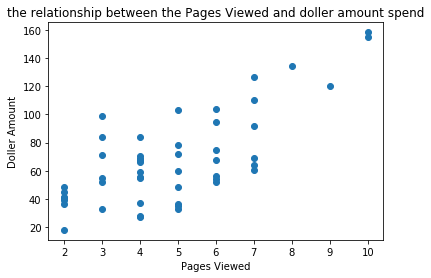

In [0]:
plt.scatter(data['Pages Viewed'],data['Amount Spent ($)'])
plt.xlabel('Pages Viewed')
plt.ylabel('Doller Amount')
plt.title('the relationship between the Pages Viewed and doller amount spend')

Text(0.5, 1.0, 'the relationship between the Pages Viewed and Time Viewed')

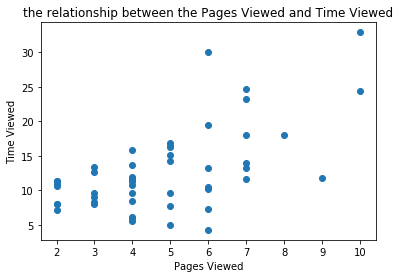

In [0]:
plt.scatter(data['Pages Viewed'],data['Time (min)'])
plt.xlabel('Pages Viewed')
plt.ylabel('Time Viewed')
plt.title('the relationship between the Pages Viewed and Time Viewed')

In [0]:
data2=DataFrame(data.iloc[:,3:])
data2

,Time (min),Pages Viewed,Amount Spent ($)
0,12.0,4,54.52
1,19.5,6,94.90
2,8.5,4,26.68
3,11.4,2,44.73
4,11.3,4,66.27
5,10.5,6,67.80
6,11.4,2,36.04
7,4.3,6,55.96
8,12.7,3,70.94
9,24.7,7,68.73


In [0]:
data2.cov()

,Time (min),Pages Viewed,Amount Spent ($)
Time (min),36.763776,7.356939,113.753345
Pages Viewed,7.356939,4.150612,47.685384
Amount Spent ($),113.753345,47.685384,1046.118672


In [0]:
data2.corr()

,Time (min),Pages Viewed,Amount Spent ($)
Time (min),1.000000,0.595568,0.580048
Pages Viewed,0.595568,1.000000,0.723667
Amount Spent ($),0.580048,0.723667,1.000000
